In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [13]:
data = pd.read_csv(r"C:\Users\asus\Documents\auto-mpg.csv")
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
data.isna().sum()
data.drop(columns=['car name'], inplace=True)
df=data

In [15]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

# Convert horsepower to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill missing values with the mean of the column
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

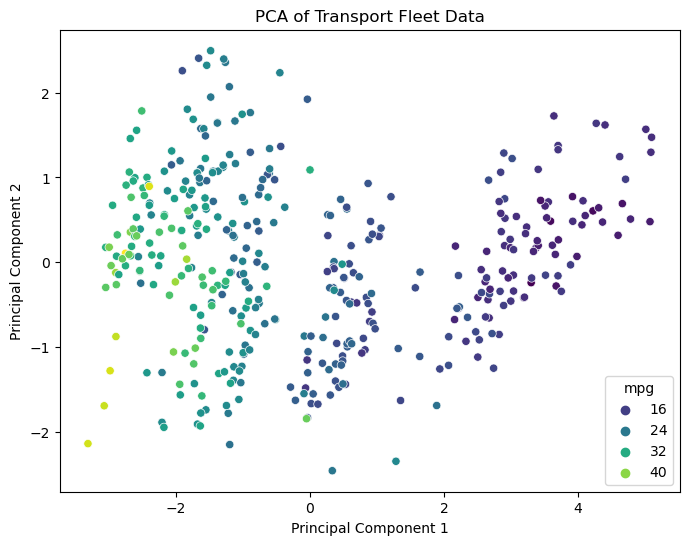

Explained variance ratio: [0.65701719 0.13422668]


In [16]:


# Load your dataset (assuming it's loaded in a DataFrame)

df = pd.DataFrame(data)

# Drop the non-numerical column 'car name'
# df = df.drop('car name', axis=1)

# Separate features and target variable
X = df.drop('mpg', axis=1)  # Features
y = df['mpg']  # Target variable

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 dimensions for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=y, palette='viridis')
plt.title('PCA of Transport Fleet Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio (how much variance is explained by each component)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


In [ ]:
`